In [2]:

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [3]:

# modify global setting
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [4]:
path = '' # path to the data

In [15]:
# Order 1 E connectivities
lv1_E_df = pd.read_csv(path + 'Fig7-VISp-L3a-order1-E-conn.csv', index_col=0)

In [20]:
# Order 1 I & Order 1-> Order 2 E connectivities 
lv12_I_df = pd.read_csv(path+'Fig7-VISp-L3a-Inh-conn-mastersheet.csv') 

In [21]:
# number of each order 1 inhibitory cell type
n_DTC = lv12_I_df[lv12_I_df['cell_type'] == 'DTC'].shape[0]
n_PTC = lv12_I_df[lv12_I_df['cell_type'] == 'PTC'].shape[0]
n_ITC = lv12_I_df[lv12_I_df['cell_type'] == 'ITC'].shape[0]
n_STC = lv12_I_df[lv12_I_df['cell_type'] == 'STC'].shape[0]

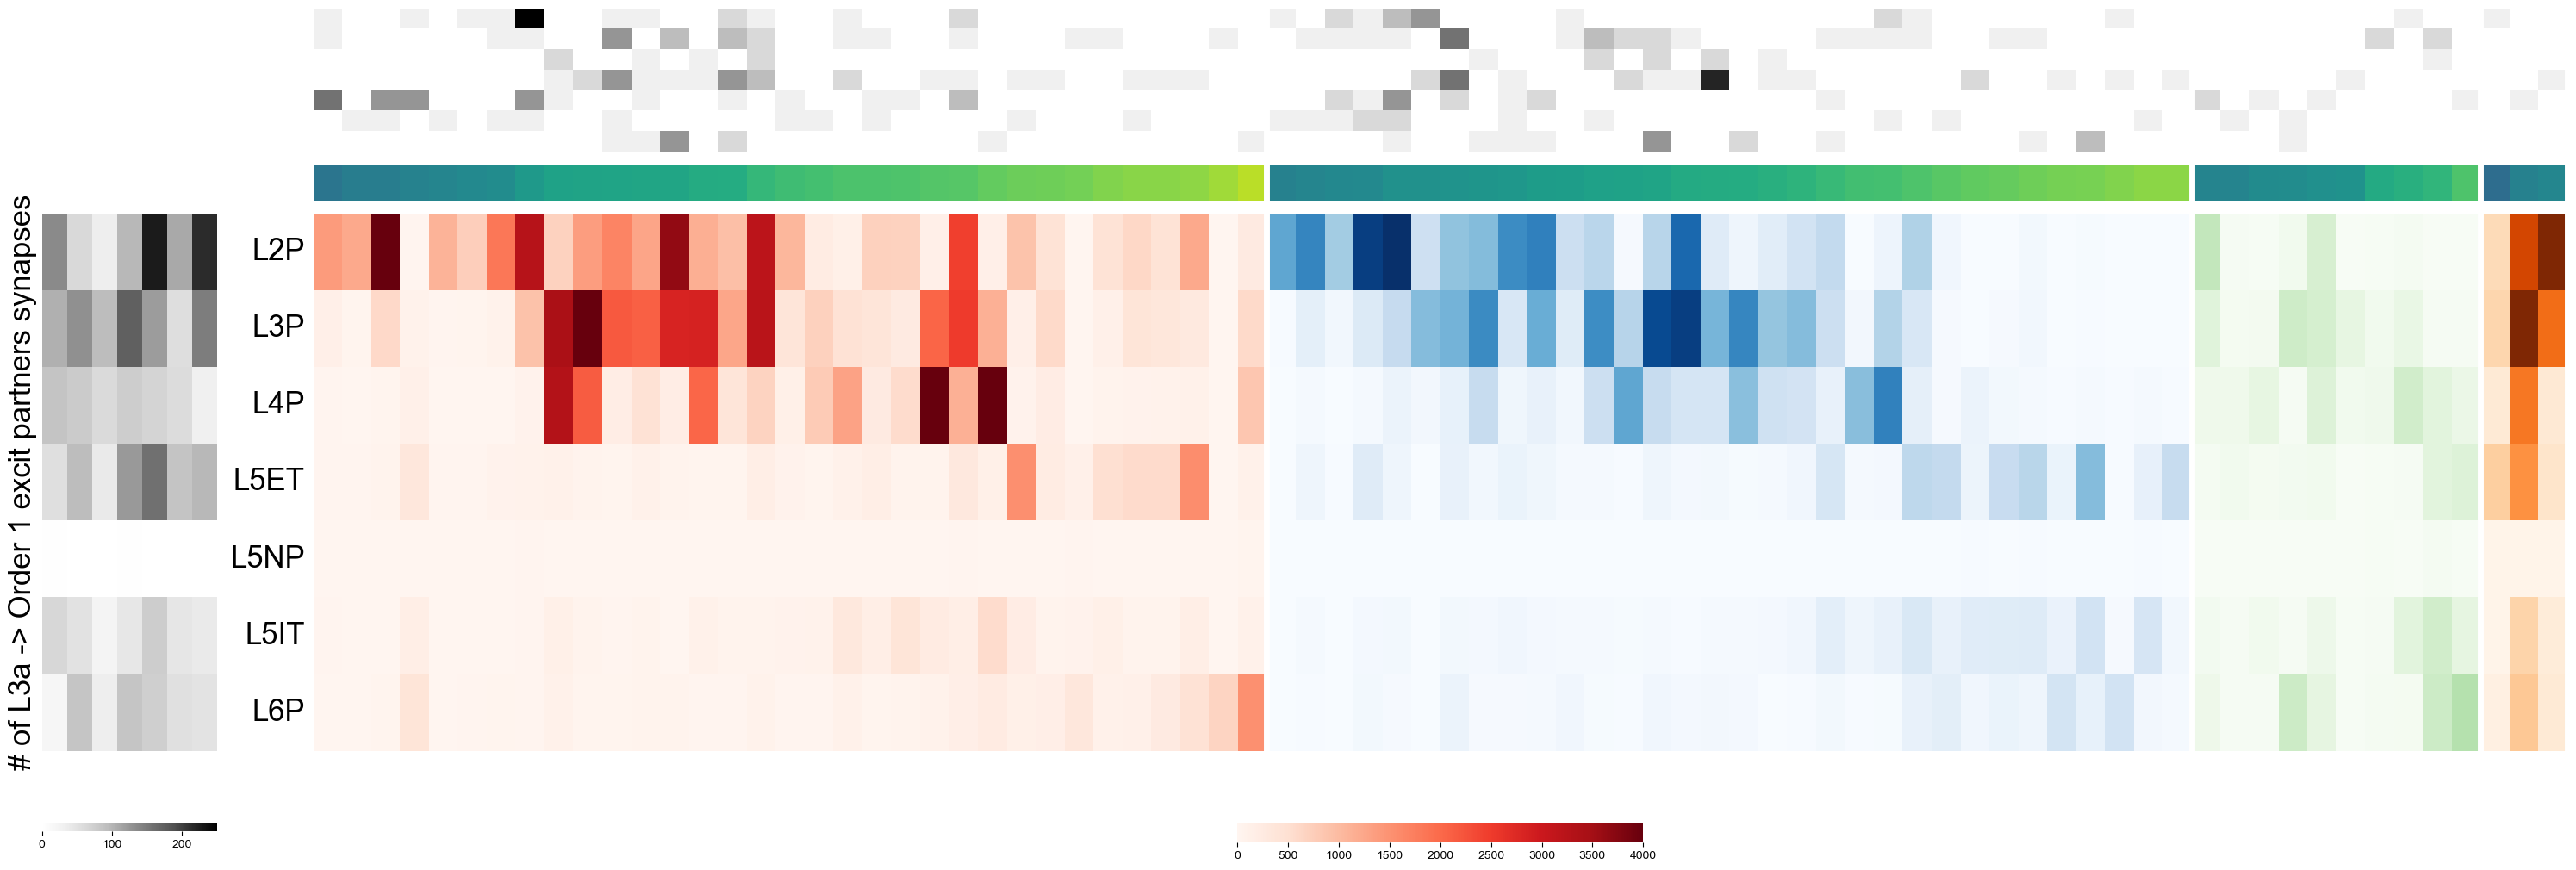

In [33]:

# Create the figure
fig = plt.figure(figsize=(30, 11))  

gs = fig.add_gridspec(3, 2, figure=fig, height_ratios=[4, 1, 20], width_ratios=[1.4, 18])

# Add subplots to the grid
ax1 = fig.add_subplot(gs[2, 0])  
ax2 = fig.add_subplot(gs[0, 1])  
ax3 = fig.add_subplot(gs[1, 1])  
ax4 = fig.add_subplot(gs[2, 1])  

# L3a->order 1 excit partners synapses
sns.heatmap(lv1_E_df, ax=ax1, cmap='Greys', vmin=0, vmax= 250, cbar_kws={'orientation':'horizontal', 'pad':0.1})
ax1.set_ylabel('# of L3a -> Order 1 excit partners synapses', fontsize=25)

# L3a -> order 1 inhib partner synapses
sns.heatmap(lv12_I_df.iloc[:,1:8].T, ax=ax2, cmap='Greys', vmin=0, vmax= 8, cbar=False)

# Order 1 inhib parterner cortical depth
column_index = lv12_I_df.columns.get_loc('cell_type')
sns.heatmap(lv12_I_df.iloc[:,column_index-1:column_index].T , ax=ax3, cmap='viridis', vmin=0, vmax=1050, cbar=False)

# Order 1 inhib partner -> Order 2 inhib excit partner synapses
lv2_matrix = lv12_I_df.iloc[:, 10:17].T

m1 = n_DTC
m2 = n_DTC + n_PTC
m3 = n_DTC + n_PTC + n_ITC

mask1 = np.zeros_like(lv2_matrix, dtype=bool)  
mask1[:, m1:] = True  # Mask everything except the first x columns

mask2 = np.zeros_like(lv2_matrix, dtype=bool)
mask2[:, :m1] = True  
mask2[:, m2:] = True  

mask3 = np.zeros_like(lv2_matrix, dtype=bool)
mask3[:, :m2] = True  
mask3[:, m3:] = True

mask4 = np.zeros_like(lv2_matrix, dtype=bool)
mask4[:, :m3] = True  

sns.heatmap(lv2_matrix, mask=mask1, ax=ax4, cmap='Reds', vmin=0, vmax=4000, cbar=True, 
            cbar_kws={"orientation": "horizontal", "shrink": 0.18, "pad":0.1})
sns.heatmap(lv2_matrix, mask=mask2, ax=ax4, cmap='Blues', vmin=0, vmax=4000, cbar=False
           )
sns.heatmap(lv2_matrix, mask=mask3, ax=ax4, cmap='Greens', vmin=0, vmax=200, cbar=False 
            )
sns.heatmap(lv2_matrix, mask=mask4, ax=ax4, cmap='Oranges', vmin=0, vmax=200, cbar=False)


# Add white lines to separate the cell types
coords = [n_DTC, n_PTC, n_ITC, n_STC]
for ax in [ax2, ax3, ax4]:
    for i,n in enumerate(coords):
        x = sum(coords[:i+1])
        ax.vlines(x, 0, 10, color='white', lw=5)

# Remove axis labels
for ax in [ax1, ax2, ax3]:
    ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

# Set y-axis labels
ax4.tick_params(axis='both', which='both', left=False, bottom=False, labelbottom=False, rotation=0)
ax4.set_yticklabels(['L2P', 'L3P', 'L4P', 'L5ET', 'L5NP', 'L5IT', 'L6P'], fontsize=25)

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig(path + 'Fig7-VISp-L3a-I-E-conn.tif', dpi=300, bbox_inches='tight')
